# Crytogram Fun
This is the encryption script that takes a message to be encoded. 
The resultant crytogram will be an sqaure image, with the message hidden in one row. 
The message will take up the entire row, so since it is a square image, the height will also be the length of the message. 

Three inputs will be needed:
1. The Message as a string
2. The Mask as a string
3. The Line of Interest where the message will be. 

### The Message
Put in your message below.

In [2]:
message = "This is the message, it can say anything you'd like because it will be converted to UTF-8.\n\tIt can even do special characters as used in this line."

print(f"Here is your message:\n{message}\n\nKeep in mind for later that your line of interest must be less than {len(message)}!")

Here is your message:
This is the message, it can say anything you'd like because it will be converted to UTF-8.
	It can even do special characters as used in this line.

Keep in mind for later that your line of interest must be less than 147!


### The Mask
Put in your mask below.

In [15]:
mask = "Awesome Example Mask!"

print(f"Here is your mask:\n{mask}")

Here is your mask:
Awesome Example Mask!


### The Line of Interest
Put in the row number of the masked message. Keep in mind, indexing starts at 0.

In [12]:
lineOfInterest = 69

if lineOfInterest < len(message) and lineOfInterest >= 0:
    print(f"You're line of interest is {lineOfInterest}!")
else:
    print(f"Try again\n\tYou're line of interest must be greater than or equal to 0, but less than {len(message)}")

You're line of interest is 69!


### Package import section

In [17]:
%matplotlib inline
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os


### Create the image

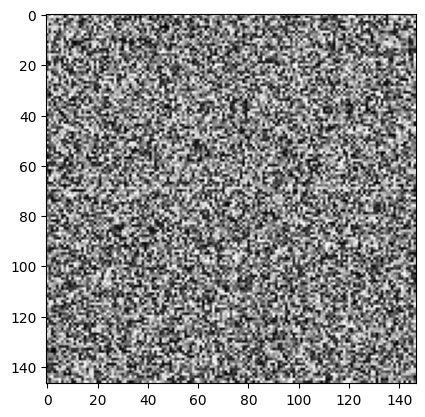

In [18]:
# Create a numpy array that holds the UTFs of the message and then interate over the mask to apply it to the array
lOIArr = np.empty(len(message), dtype = np.uint8)
maskPosition = 0
for i in range(len(message)):
    realVal = int.from_bytes(bytes(message[i],'UTF-8'),byteorder='big')
    maskVal = int.from_bytes(bytes(mask[maskPosition],'UTF-8'),byteorder='big')
    fakeVal = realVal + maskVal
    if fakeVal > 255:
        fakeVal -= 255
    lOIArr[i] = fakeVal
    maskPosition += 1
    if maskPosition > len(mask)-1:
        maskPosition = 0

# Create a matrix of the same height and width of the length of the masked array.
# Create noise in the matrix that is bound by the max/min of the masked array.
# Insert the masked array into the matrix at the line of interest

arr = np.empty((len(message),len(message)), dtype = np.uint8)
for i in range(len(message)):
    for j in range(len(message)):
        if i == lineOfInterest:
            arr[i,:] = lOIArr
            break
        else:
            arr[i,j] = np.random.randint(np.amin(lOIArr),np.amax(lOIArr))

# Show the image
plt.imshow(arr, cmap='gray')
plt.show()  

### Save the Image

In [21]:
# This is the file name, do not include the extension.
imageName = "Crytogram"

##########
imagePath = os.path.join(os.getcwd(),f'{imageName}.png')
saved = cv2.imwrite(imagePath,arr)
if saved:
    print("Saved properly")
else:
    print("Did not save properly, check your file path.")

Saved properly


In [135]:
img2 = cv2.imread(imagePath,-1)

In [136]:


intArr = img2[lineOfInterest,:]
maskPosition = 0
fixedArr = np.empty(len(address), dtype = np.uint8)
for i in range(len(intArr)):
    fakeVal = intArr[i]
    maskVal = int.from_bytes(bytes(mask[maskPosition],'UTF-8'),byteorder='big')
    fixedVal = fakeVal - maskVal
    if fixedVal < 0:
        fixedVal += 255
    fixedArr[i] = fixedVal
    maskPosition += 1
    if maskPosition > len(mask)-1:
        maskPosition = 0
fixedByteArr = fixedArr.tobytes()
hiddenAddress = fixedByteArr.decode('UTF-8')
print(hiddenAddress)


Evolv Apartments
370 North State Highway 360
Apartment 1200
Mansfield, Texas 76063
